In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial import distance

import pandas as pd
# import seaborn as sns
import glob, os
from mpl_toolkits import mplot3d
import pickle

# sns.set_context("notebook")
%matplotlib inline


In [3]:

# jtplot.style()
# jtplot.reset()
%matplotlib inline

AllFontSize=18
plt.style.use('seaborn-muted')
colors=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063']
colors_new=cycler(color=['#4878CF', '#6ACC65', '#D65F5F', '#C4AD66','#77BEDB', '#B47CC7','gray','#98b5f4','#fd97ee','#a30063'])
# This is what makes the CMU Sans Serif Minus Sign work
# matplotlib.rcParams['axes.unicode_minus'] = False

plt.rcParams['axes.prop_cycle'] = colors_new
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.labelsize'] = AllFontSize
plt.rcParams['axes.facecolor'] ='w' 
# plt.rcParams['axes.edgecolor']='k'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.titlesize'] = AllFontSize
# plt.rcParams['grid.color'] = 'BBBBBB'
# plt.rcParams['grid.linestyle'] = ':'
# plt.rcParams['grid.linewidth'] = 0.5
# plt.rcParams['grid.alpha'] = 1
plt.rcParams['legend.fontsize'] = AllFontSize
plt.rcParams['legend.frameon'] = False 
plt.rcParams['xtick.labelsize'] = AllFontSize
plt.rcParams['ytick.labelsize'] = AllFontSize
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=False
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
# plt.rcParams['xtick.minor.size']=2
# plt.rcParams['ytick.minor.size']=2
# plt.rcParams['savefig.bbox']='tight'
plt.rcParams['font.sans-serif'] = "CMU Sans Serif"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = 'cm' 
# plt.rcParams['text.usetex']=True 
# plt.rcParams['text.latex.unicode'] = True

In [4]:
def list_files(directory, extension):
    return list((f for f in os.listdir(directory) if f.endswith('.' + extension)))

def closest_node(nodedf, nodesdf):
#     node=nodedf[['coor1','coor2']].values[0]
    node=nodedf[1][[2,3]]

    nodes=nodesdf[['coor1','coor2']].values
                                                       
    closest_index = np.argsort(distance.cdist([node], nodes))
    return closest_index[0]#,nodes[closest_index][0]

def normal_vectors(dfloc):
    cpall=[]
    for nod0 in dfloc.iterrows():
        ind=closest_node(nod0,dfloc)
        p1=nod0[1][[2,3,1]].values
        p2=dfloc[['coor1','coor2','val']].iloc[ind[1]].values
        p3=dfloc[['coor1','coor2','val']].iloc[ind[2]].values

        # These two vectors are in the plane
        v1 = list(p3 - p1)
        v2 = list(p2 - p1)

        # the cross product is a vector normal to the plane
        cp = np.cross(v1, v2)
        cp = cp/mag(cp)
        
        cpall.append(np.abs(cp))
    
    mean=np.mean(cpall,axis=0)
    mean=mean/mag(mean)   
    return mean

def evaluate_cross(cp,vector):
    return np.abs(np.dot(cp, vector))

def evaluate_cross_list(cpall,vector):
    d=[]
    for cp in cpall:
        d.append(np.abs(np.dot(cp, vector)))
    return d

def mag(x): 
    return math.sqrt(np.sum(i**2 for i in x))

# Save Data

In [5]:
folder='PressureCavityModelV8_DoubleStacked_Periodic_P-V_Match/output/'
files=list_files(folder,'txt')
files.sort()

In [ ]:
data=[]
for file in files:
    info=file.split('_')[1:3]
    print(info)
    fline=open(folder+file).readline().rstrip()
    vol=fline.split(',')[0].split(':')[1]
    
    df=pd.read_csv(folder+file,delimiter=' ',skiprows=1,names=['loc','val','coor1','coor2','coor3'])
    dfb=df[df['loc']=="BOTTOM-NODES"]
    dft=df[df['loc']=="TOP-NODES"]cond
    
    pvector=normal_vectors(dfb)
    data.append([float(info[0]),float(info[1]),float(vol),pvector])
with open('listfile.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(data, filehandle)

['45', '0']


C:\Users\mathe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


['45', '100']
['45', '10']
['45', '11']
['45', '12']
['45', '13']
['45', '14']
['45', '15']
['45', '16']
['45', '17']
['45', '18']
['45', '19']
['45', '1']
['45', '20']
['45', '21']
['45', '22']
['45', '23']
['45', '24']
['45', '25']
['45', '26']
['45', '27']
['45', '28']
['45', '29']
['45', '2']
['45', '30']
['45', '31']
['45', '32']
['45', '33']
['45', '34']
['45', '35']
['45', '36']
['45', '37']
['45', '38']
['45', '39']
['45', '3']
['45', '40']
['45', '41']
['45', '42']
['45', '43']
['45', '44']
['45', '45']
['45', '46']
['45', '47']
['45', '48']
['45', '49']
['45', '4']
['45', '50']
['45', '51']
['45', '52']
['45', '53']
['45', '54']
['45', '55']
['45', '56']
['45', '57']
['45', '58']
['45', '59']
['45', '5']
['45', '60']
['45', '61']
['45', '62']
['45', '63']
['45', '64']
['45', '65']
['45', '66']
['45', '67']
['45', '68']
['45', '69']
['45', '6']
['45', '70']
['45', '71']
['45', '72']
['45', '73']
['45', '74']
['45', '75']
['45', '76']
['45', '77']
['45', '78']
['45', '79']
['45

# Load Data

In [5]:
with open('listfile.data', 'rb') as filehandle:
    # read the data as binary data stream
    dataload = np.array(pickle.load(filehandle))

for i in range(dataload.shape[0]):
    dataload[i,3]=dataload[i,3][2]
df=pd.DataFrame(dataload,columns=['angle','frame','vol','val'])

Text(0, 0.5, 'Reflection Vector')

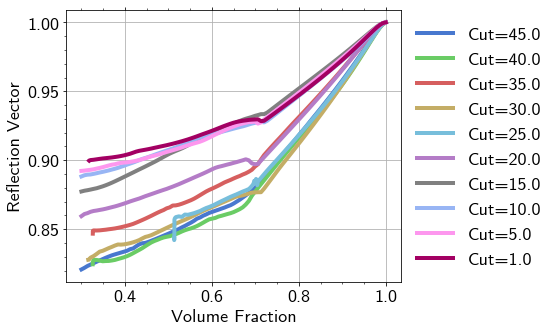

In [31]:
for col in df.angle.unique():
    li=df[df.angle==col].sort_values(by=['frame'])
    li.vol=li.vol/max(li.vol)
    plt.plot(li.vol,li.val,label='Cut={}'.format(90-col))
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Volume Fraction')
plt.ylabel('Reflection Vector')
# plt.ylim([0,1])